In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('NVDA(2).csv',parse_dates=True,index_col='Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-23,37.422501,37.422501,36.227501,36.830002,36.579872,59184400
2019-05-24,37.020000,37.375000,36.220001,36.287498,36.041054,35758400
2019-05-28,36.465000,36.794998,35.812500,35.832500,35.589134,42835600
2019-05-29,35.352501,35.705002,34.735001,35.084999,34.846722,55980000
2019-05-30,35.077499,35.437500,34.392502,34.777500,34.580738,39430000
...,...,...,...,...,...,...
2024-05-17,943.690002,947.400024,918.059998,924.789978,924.789978,35969100
2024-05-20,937.500000,952.000000,934.400024,947.799988,947.799988,31876400
2024-05-21,935.989990,954.000000,931.799988,953.859985,953.859985,32894600


In [18]:
###Simulate future paths ###
#Simulation parameters
n_sims=10000
num_simulations=1000
num_days=2
forcast_days=365
#initialize the simulation array,with all zeros
simulations=np.zeros((num_simulations,num_days))

#Get the last adjusted close price
last_price=df['Adj Close'].iloc[-1]

#calculate the daily returns and drop and remove any NA values
daily_returns=df['Adj Close'].pct_change().dropna()


In [19]:
# Initialize the simulation matrix with zeros
simulations = np.zeros((num_simulations, forcast_days))

# Loop through the number of simulations to forecast future cumulative returns for the asset
for i in range(num_simulations):
    # Get random daily returns of size forecast_days and calculate cumulative product for returns
    random_returns = np.random.choice(daily_returns, size=forcast_days, replace=True)
    cumulative_returns = np.cumprod(1 + random_returns)  # Use cumprod for cumulative product of returns

    # Simulate the future price path with the random cumulative returns
    simulations[i, :] = last_price * cumulative_returns

# Print the simulations matrix
print(simulations)


[[1117.72205544 1111.65423321 1142.22252324 ... 2563.33669776
  2530.533418   2556.73778493]
 [1049.84897459 1082.85669105 1082.94058979 ...  924.51575324
   935.71342683  923.42577421]
 [1044.79658425 1078.63143731 1043.84002985 ... 6524.71616303
  6551.83054428 6764.00603099]
 ...
 [1090.15140507 1123.19850068 1078.66719435 ... 1460.74871954
  1558.39312608 1634.62872978]
 [1062.99040077 1099.20689161 1093.7443683  ... 2548.84361715
  2466.94290304 2474.4768511 ]
 [1065.84673561 1075.41817285 1087.88907491 ... 4539.01877099
  4807.59863935 5071.3513966 ]]


In [20]:
#For simulation '3' I'm going to show the first four random cumulative returns out of the 365 random cumulative returns starting from index 0 upto but not including 4
print(simulations[2,0:4])

[1044.79658425 1078.63143731 1043.84002985 1041.81891786]


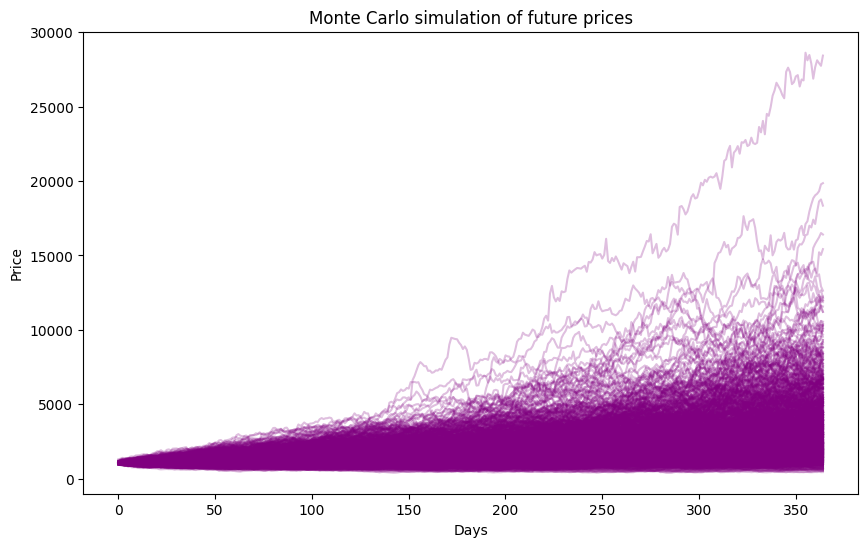

In [21]:
#plot the results
plt.figure(figsize=(10,6))
plt.plot(simulations.T, color='purple',alpha=0.25)
plt.title('Monte Carlo simulation of future prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

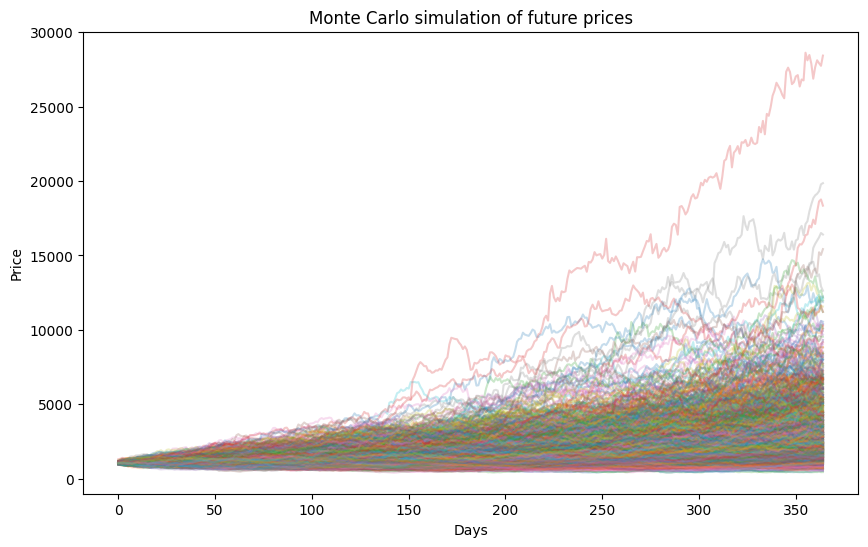

In [22]:
#plot the results
plt.figure(figsize=(10,6))
for i in range(num_simulations):
    plt.plot(simulations[i],alpha=0.25)
plt.title('Monte Carlo simulation of future prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()